# Introducing scikit-learn

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston # house prices in Boston in 70s
X, y = load_boston(return_X_y=True) # returns 2 arrays, y (price in 1000s of dollars) and X (properties of houses)

C:\Users\Nick\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

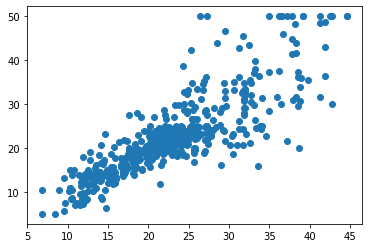

In [9]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor() # create regressors
mod.fit(X, y) # learn from data
pred = mod.predict(X) # returns predicted prices for all houses

'''# predictions will be different but API is the same, can easily use different models
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X, y) # learn from data
mod.predict(X) # returns predicted prices for all houses
'''

plt.scatter(pred, y) # shows there's some sort of correlation (e.g. high predicted house price ~= high actual house price)

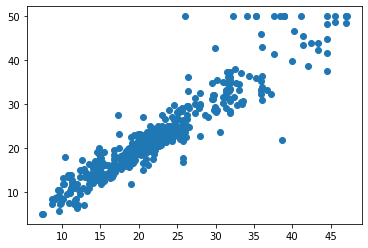

In [14]:
# need to scale variables to ensure one doesn't have too much of an effect when being used to classify e.g. square feet in 1000s of m, but distance in km (lower magnitude values)
# can make scaling a part of the pipeline, treating the model as both the scaler and the ML algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# needs list of tuples with the name and the object
pipe = Pipeline([("scale", StandardScaler()), ("model", KNeighborsRegressor())])

pipe.fit(X, y)
pred = pipe.predict(X)
plt.scatter(pred, y) # better than last time, less scatter

In [20]:
# but still using same dataset to both fit and evaluate, can see that you get a straight line in plot above by making n_neighbors=1 in KNeighborsRegressor() - falsely suggests you're making perfect predictions (only because you're just memorising the original data) - data leakage
# need to figure out how to do a fair comparison and also how to pick the right number of neighbours for algorithm to determine house price from the best number of other data points

# can use grid search to do cross-validation and see which n_neighbour value is the best (model is now the scaling, algorithm, and cross-validation/hyperparameter search)
from sklearn.model_selection import GridSearchCV

mod = GridSearchCV(
    estimator=pipe, # estimator is something that has fit and predict methods
    param_grid={"model__n_neighbors": [1,2,3,4,5,6,7,8,9,10]}, # all the settings to change during search - can use pipe.get_params() to get names of all the ones you want
    cv=3 # cross validation
)
mod.fit(X, y)
pd.DataFrame(mod.cv_results_) # returns dictionary/df of results from each setting and cv fold (time taken, scores etc)

# TIP: use this pattern of constructing pipelines and using fit(), predict() - easily changeable, reproducible

# To extend this, need to look into Boston dataset itself e.g. by doing print(load_boston()['DESCR'])
# - low number of instances, old data, inappropriate/biased attributes e.g. using proportion of black people in a town
# - high correlation scatter plots and increasing test scores due to grid search can make you blind to issues with the data or the process - remain skeptical of the model and stress-test as much as possible (output of ML model AS WELL AS the data into the model are both your responsibility)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002820,0.000611,0.005669,0.001893,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.002334,0.000470,0.004464,0.002530,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.004007,0.001637,0.002990,0.000807,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.003670,0.001699,0.004663,0.001244,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002002,0.000001,0.002999,0.001415,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.002673,0.001248,0.002324,0.000460,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001667,0.000470,0.002334,0.001249,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001002,0.000002,0.002333,0.000471,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001999,0.000818,0.003997,0.000819,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001001,0.000002,0.002332,0.000470,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


# Preprocessing

Good to transform data used to prediction before fitting, results in better model performance

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [24]:
df = pd.read_csv("sklearn_preproc1.csv")
df.head(3) # z column is either 'a' or 'b' - target

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


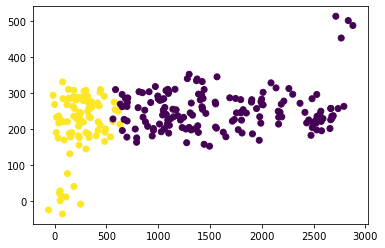

In [25]:
X = df[['x', 'y']].values
y = df['z'] == "a"
plt.scatter(X[:, 0], X[:, 1], c=y) # shows outliers on both low and high x-values, x and y axes are on different scales too - rescale data to be more numerically stable without losing info

## Apply scaler

Scaler calculates mean and variance: new_x = x - mean(x)/sqrt(var(x)) -> ensures x is between -1 and 1

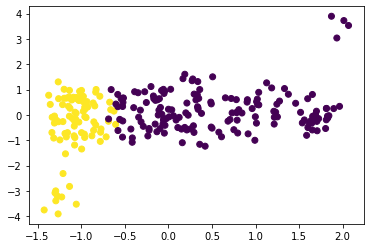

In [28]:
from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
# if just doing StandardScaler().fit_transform(X) and plotting in same way as above, you'd get x and y axes that are much more similar but spread of axes is still different, and nothing done to outliers
# using quantiles to scale helps map outliers better

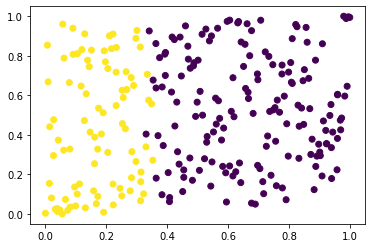

In [26]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y) # data now between 0 and 1, clusters of outliers still in data but have less effect

In [30]:
# comparing standard scaler and quantile transformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights="distance"))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

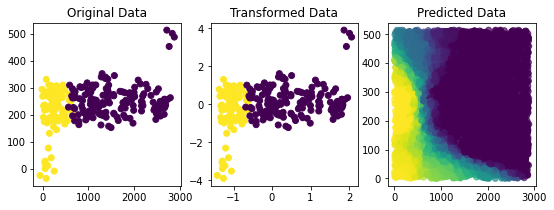

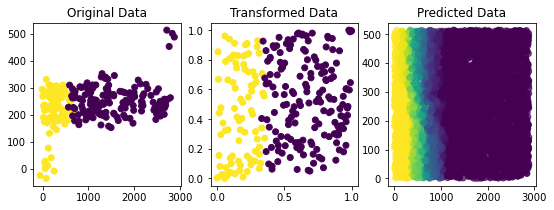

In [31]:
# Effect of StandardScaler
plot_output(scaler=StandardScaler())

# Effect of QuantileTransformer
plot_output(scaler=QuantileTransformer(n_quantiles=100))

# quantile transformer less influenced by outliers - good to verify stability with grid search

## Second dataset

Not a linearly-separable classification task

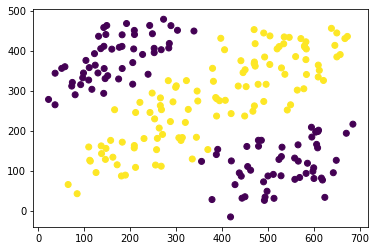

In [32]:
df = pd.read_csv("sklearn_preproc2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y)

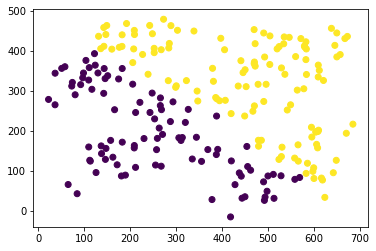

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

# quantile transformer + logistic regression - bad classifier, line doesn't separate groups properly, can only use thw two columns of linear features
# can create non-linear features from the two linear ones e.g. x1*x2, x1**2, x2**2 using PolynomialFeatures() with default values (which calculates the mentioned non-linear features to degree 2)

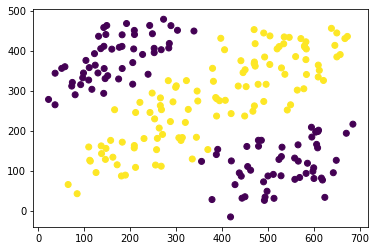

In [35]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

## One hot encoding

For data with non-numeric classes

In [36]:
from sklearn.preprocessing import OneHotEncoder

arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
enc = OneHotEncoder(sparse=False, handle_unknown='ignore') 
enc.fit_transform(arr)

# sparse=False lets you see the matrix (left to right = alphabetical order of classes)
# this numeric representation would be the y you'd pass into model to train/evaluate on

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [37]:
# telling encoder to transform an unknown class (not "low", "high", or "medium", the ones that the encoder was fit on) results in all 0s if handle_unknown set to 'ignore' (otherwise ValueError)
# handle_unknown set to 'ignore' is useful for generating X, not y (want to have clearly defined labels)
enc.transform([["zero"]])

array([[0., 0., 0.]])

In [ ]:
# drawdata.xyz - play around with preprocessors here and generate sample data that can be read in to do the same stuff above

# Metrics

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df  = pd.read_csv("sklearn_metrics_creditcard.csv")[:80_000] # data from https://www.kaggle.com/mlg-ulb/creditcardfraud - only taking subset due to large size
df.head(3) # features are anonymised characteristics of a transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [39]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}" # unbalanced dataset, lots of cases without fraud than with

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [40]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000) # won't converge due to unbalanced dataset, need to make number of iterations higher
# class weights let you assign weight to each class (class 0 (non-fraud) has weight of 1, class 1 (fraud) has weight of 2 and this will help detect more fraud cases) - without this, would detect fewer cases than there actually are, even when overfitting on dataset, which is good but a bit underfitting so you want to move model in the direction you want it to

mod.fit(X, y).predict(X).sum() # want to optimise class weight parameter above now via grid search

171

In [42]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]}, 
    cv=4,
    n_jobs=-1 # for parallel processing
)
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [43]:
pd.DataFrame(grid.cv_results_) # how did grid search come up with test scores? we didn't put any metrics in GridSearchCV... 
# scoring comes from LogisticRegression() - can check by doing lr = LogisticRegression(), lr.score (and ??LogisticRegression().score for implementation)
# LR scores based on accuracy i.e. test scores below are accuracies - model is predicting no fraud most of the time anyway so high scores are expected

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.783876,0.394505,0.005498,0.000863,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.487625,0.441825,0.006253,0.001640,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,1.369780,0.105114,0.005250,0.003963,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


In [47]:
# better metrics than accuracy, can add them to grid search
from sklearn.metrics import precision_score, recall_score, make_scorer

print(precision_score(y, grid.predict(X))) # given fraud predicted, what proportion is actually fraud
print(recall_score(y, grid.predict(X))) # were all fraud cases detected

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, # for higher resolution of class weights than before 
    scoring={'precision': make_scorer(precision_score), # make_scorer needed to use precision and recall scores 
    # default value for 'greater_is_better' parameter in make_scorer is True, which is not correct for metrics like mean squared error where greater is worse -> can pass in make_scorer(..., greater_is_better = False)
    # also default value for 'needs_proba' parameter is False, so need to make this True if you need a probability measure for your metric
    # see other parameters by doing ?make_scorer
             'recall': make_scorer(recall_score),
            },
    refit='precision', # to select best model based on based on precision or recall
    return_train_score=True, # return training scores in cross-validation results too
    cv=10, # more folds
    n_jobs=-1 # for parallel processing
)
grid.fit(X, y)

0.7682119205298014
0.5918367346938775


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724

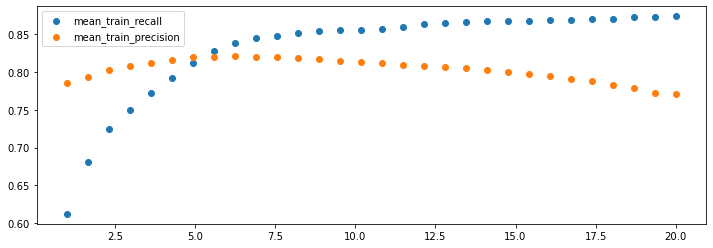

In [50]:
# summarising train results of grid search from above
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend()

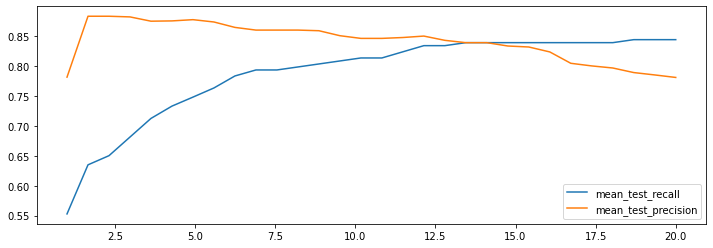

In [49]:
# summarising test results of grid search from above
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()

# plot has class weight on x-axis, scores on y-axis
# can either optimise for precision (on left, lower class weight) or recall (vice versa)... or both (in middle), see below modification to grid search code (could also use f1 score instead)

In [52]:
def min_recall_precision(est, X, y_true, sample_weight=None): # sample weight lets you specify some rows as more important than others e.g. large transaction amounts - would need to rewrite function and pass in a sample weight when doing .fit(), see video
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, 
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision}, # don't need to do make_scorer(min_recall_precision) if you have the method signature like above
    refit='min_both', # to select best model based on based on precision, recall, or the minimum out of the two
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827

In [ ]:
# summarising train results of grid search from above
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend()

In [ ]:
# summarising test results of grid search from above
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()

''' 
figure out why green line is lower than the other two
'''

## Outlier detection models

Fraud is like an outlier (a rare event but something out of the ordinary), so we can replace logistic regression with an outlier detector and adapt the metrics

In [53]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X) # no labels needed
Counter(mod.predict(X)) 
# sklearn thinks 1 is not an outlier, -1 is an outlier - need to translate using np.where below

Counter({1: 77135, -1: 2865})

In [54]:
np.where(mod.predict(X) == -1, 1, 0) # if prediction is -1 then make it a 1, otherwise default value is 0

array([0, 0, 0, ..., 0, 0, 0])

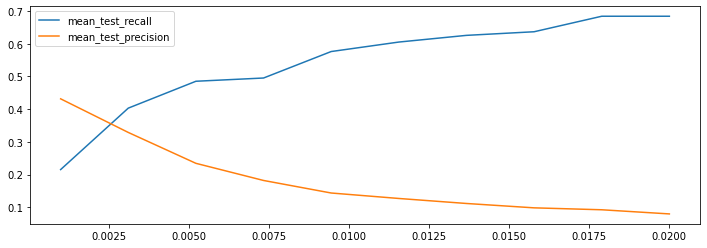

In [55]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)}, # contamination factor (tunable hyperparameter)
    scoring={'precision': outlier_precision, # normal recall and precision scores expect 0 and 1s, not -1s, so need to write own variants of recall and precision scores as above to create fraud label predictions
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y)

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'], 
             df_results[score], 
             label=score)
plt.legend()

# can use outlier detection algorithms as classifiers, not able to detect fraud as well as logistic regression (but still could be useful to have in pipeline)
# lots of sklearn metrics exist in documentation, can look them up and use as needed
# for both regression and outlier detection, need to be aware that labels in dataset might just correspond to the easy cases of fraud that were detected and creating a model based on that could mean fraud cases that are harder to detect are not detected at all, so if labels are wrong then so are the metrics